In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Brownian motion: First passage time to exit the interval (0, L)
Assume 1D Brownian motion with diffusivity $D>0$. 
Consider the mean first passage time $T(x_0)$, which satisfies
$$ DT'' = -1,\qquad x_0\in (0, L)$$
with boundary conditions
$$T(0) = T(L) = 0.$$
The solution is given by
$$T(x_0) = \frac{x_0(L-x_0)}{2D}$$

Mean first passage time (simulations): 137.8902000000007
Mean first passage time (exact): 138.88888888888889


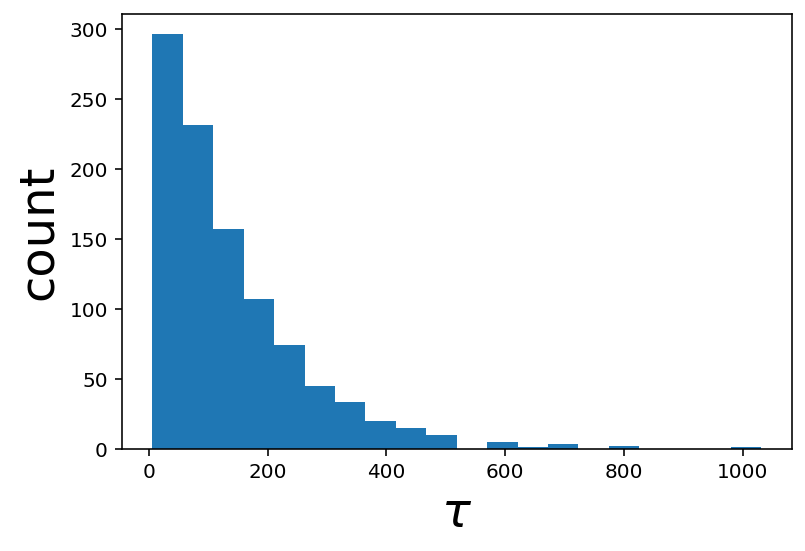

In [15]:
D = 2
sigma = sqrt(2.*D)
L = 50.
x0 = L/3. # must be between zero and L

def first_passage_time_FAST(): ## this is a faster version
    dt = 0.1
    dW_stdev = sigma*sqrt(dt)
    Nbuffer = 10000
    # Z = zeros(Nsteps) # we do not need to store the entire path
    # Z[0] = z0
    x = x0
    t = 0
    j = 0
    while True: # this will simply loop forever unless otherwise stopped in the loop
        ## if a bug ever causes a loop to continue forever, you can halt the process by
        ## pushing the 'interupt' button (looks like a stop button in the toolbar)
        if j%Nbuffer == 0:
            dW = normal(0, dW_stdev, Nbuffer)
            j = 0
        x += dW[j]
        t += dt
        j += 1
        ## check to see if x=0 or x=L has been reached
        if x <= 0 or x >= L:
            return t ## this stops the loop and returns the time
## we want to collect many samples of the first passage time in an array
Nsamples = 1000
## Way 1: get samples using a for loop
# T = zeros(Nsamples) ## to store samples of first passage time
# for n in arange(Nsamples):
#     T[n] = first_passage_time_FAST()
## Way 2: this is a short hand way of computing T, same as the three lines in Way 1
T = array([first_passage_time_FAST() for n in arange(Nsamples)]) 

## Figure
figure(1, [6, 4])    
hist(T, bins=20)
xlabel(r'$\tau$', fontsize=24)
ylabel('count', fontsize=24);

print('Mean first passage time (simulations):', T.mean())
print('Mean first passage time (exact):', x0*(L-x0)/(2*D))

# Brownian motion: First passage time to exit the interval $(0, L)$ through $x=L$ (with $x=0$ reflecting)
Assume 1D Brownian motion with diffusivity $D>0$. 
Consider the mean first passage time $T(x_0)$, which satisfies
$$ DT'' = -1,\qquad x_0\in (0, L)$$
with boundary conditions
$$T'(0) = T(L) = 0.$$
The solution is given by
$$T(x_0) = \frac{L^2 - x_0^2}{2D}.$$

Mean first passage time (simulations): 319.357
Mean first passage time (exact): 318.75


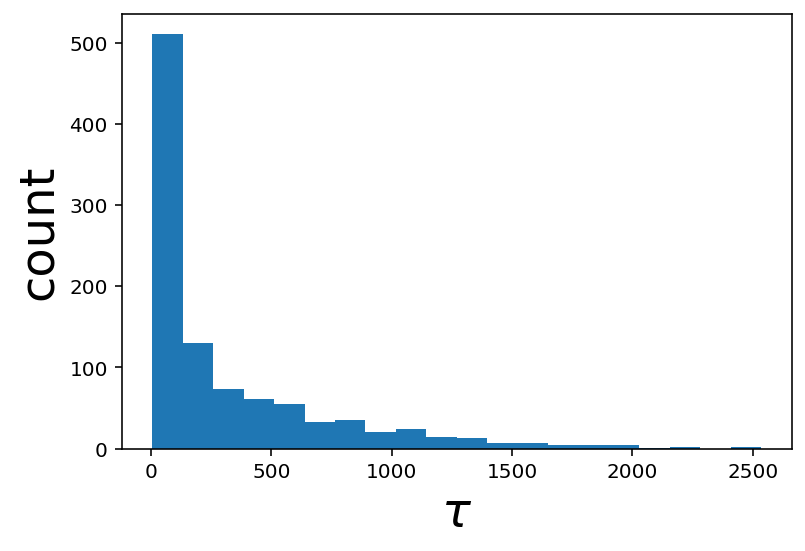

In [18]:
D = 2
sigma = sqrt(2.*D)
L = 50.
x0 = 0.7*L # must be between zero and L

def first_passage_time_FAST(): ## this is a faster version
    dt = 0.1
    dW_stdev = sigma*sqrt(dt)
    Nbuffer = 10000
    # Z = zeros(Nsteps) # we do not need to store the entire path
    # Z[0] = z0
    x = x0
    t = 0
    j = 0
    while True: # this will simply loop forever unless otherwise stopped in the loop
        ## if a bug ever causes a loop to continue forever, you can halt the process by
        ## pushing the 'interupt' button (looks like a stop button in the toolbar)
        if j%Nbuffer == 0:
            dW = normal(0, dW_stdev, Nbuffer)
            j = 0
        x += dW[j]
        t += dt
        j += 1
        ## reflecting boundary at x=0
        if x < 0:
            x = -x
        ## check to see if x=L has been reached
        if x <= 0 or x >= L:
            return t ## this stops the loop and returns the time
## we want to collect many samples of the first passage time in an array
Nsamples = 1000
## Way 1: get samples using a for loop
# T = zeros(Nsamples) ## to store samples of first passage time
# for n in arange(Nsamples):
#     T[n] = first_passage_time_FAST()
## Way 2: this is a short hand way of computing T, same as the three lines in Way 1
T = array([first_passage_time_FAST() for n in arange(Nsamples)]) 

## Figure
figure(1, [6, 4])    
hist(T, bins=20)
xlabel(r'$\tau$', fontsize=24)
ylabel('count', fontsize=24);

print('Mean first passage time (simulations):', T.mean())
print('Mean first passage time (exact):', (L**2 - x0**2)/(2*D))